# Introduction
* In the last section, we looked at the structure of a logistic regression model, and how it is similar to how the brain works in some respects 
### $$y = \sigma(w^Tx)= probability \; of \; certain\;class$$
* The most important part is understanding that linear regression is a linear model
* We have some input features called x which are each weighted by a w, and then they are all added together - this is called a linear combination 
    * Linear combination: In mathematics, a linear combination is an expression constructed from a set of terms by multiplying each term by a constant and adding the results
    * Linear Combination wiki: https://en.wikipedia.org/wiki/Linear_combination
* This is then passed through the sigmoid function, which squashes this output into the range of 0 and 1 
* The question that we did not answer was: 
### How do we find these weights?

## This section is all about finding these weights
* It is also about adding a solid probabilistic foundation to our logistic regression model 
* We will show that every part of the logistic regression model uses probabilistic reasoning 
* So it isn't just mad scientists trying to reconstruct the brain, but rather just applied statistics/probability
* In machine learning this is called **training** 
* In all machine learning models, we have parameters and we have a structure whichs define our model 
* To train a machine learning model, is to find these parameters such that our model learns to be accurate 
* In other we find parameters or weights, so that the thing we are trying to model is actually modeled accurately by our logistic regression model 

---
# Closed form solution to Bayes Classifier
* Before going forward you may want to review these links: 
    * http://rpubs.com/richarddmorey/binomial-beta
    * https://www.countbayesie.com/blog/2015/2/20/random-variables-and-expectation
    * https://www.countbayesie.com/blog/2015/2/21/variance-co-variance-and-correlation
* We are now going to look at a special case of logisitic regression-one that we can find a closed form solution to the problem (in general we cannot, and will have to use gradient descent)
* Here is the problem:
    * Your data is from two classes, and they are both gaussian distributed 
    * They have the same covariance but different means, as we can see from this pictures 

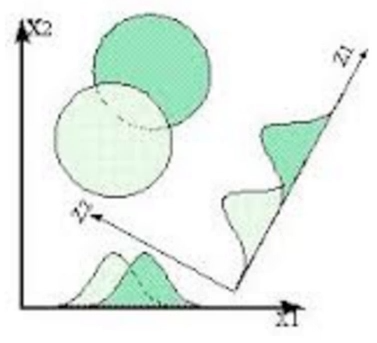

* For this example, we want to be familiar with the multivariate gaussian distribution: https://brilliant.org/wiki/multivariate-normal-distribution/ 
* this is just a probability distribution that is a function of more than 1 variable - in the image below it is the probability of having a certain x and y value, when both x and y are independently and identically distributed variables

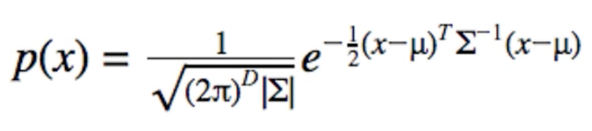

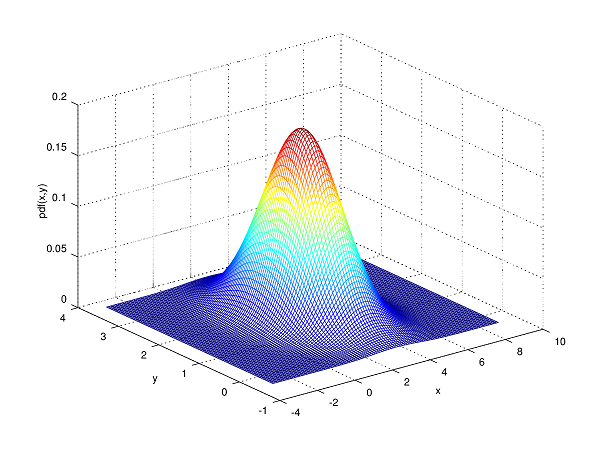

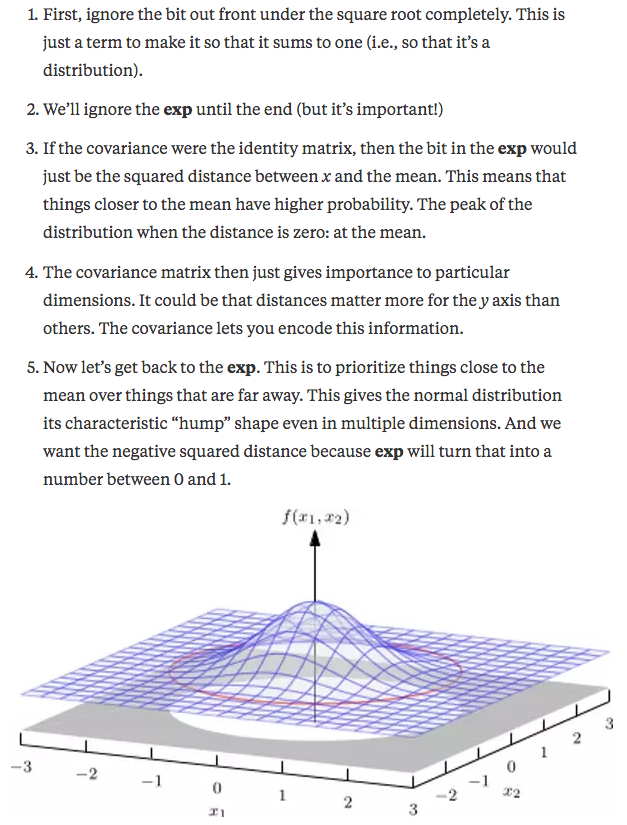

# Bayes Rule
### $$P(Y|X)=\frac{P(X|Y)*P(Y)}{P(X)}$$
* Bayes rule states that that:
* The posterior, $P(Y|X)$ is equal to the likelihood, $P(X|Y)$, times the prior, $P(Y)$, divided by $P(X)$. 
* The likelihood part is the gaussian that we just looked at above
    * We can calculate this by taking the data from each class and getting their means and covariances 
* The prior can just be the maximum likelihood estimate 
    * For example, P(Y=1) would be the number of times class 1 appears divided by the total number of samples
    
# Putting in to logistic regression framework
* The next thing we can do, is take bayes rule for the positive class and expand the bottom portion so it looks like the top portion

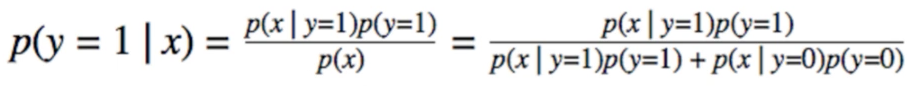

* Next we divide the top and bottom by what is on top

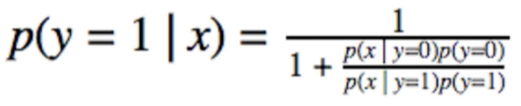

* Now we can see this is starting to look like logistic regression! 

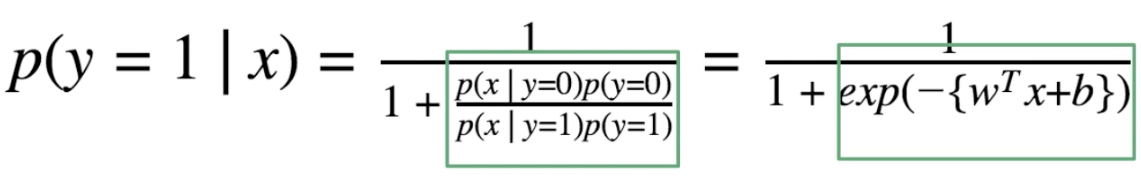

* We see that the negative of the weights times x is equal to the log of the probabilities!

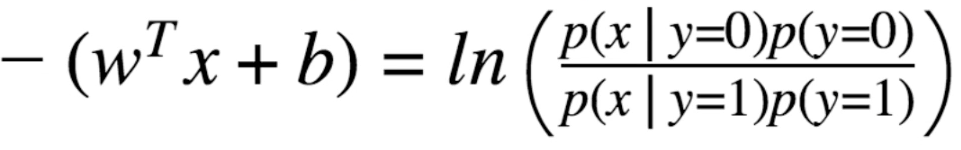

* The next step is to let:

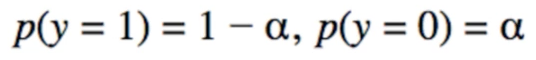

* This is done so that our equations can look a little simpler
* We can then expand everything inside the log, since it is all multiplication and division, which gives us the following equation:

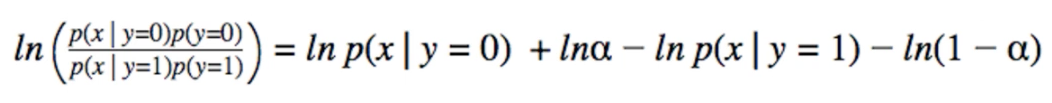

* We can then plug in the gaussian pdf, and immediately see the benefit of taking the log: everything inside the exponential will drop down

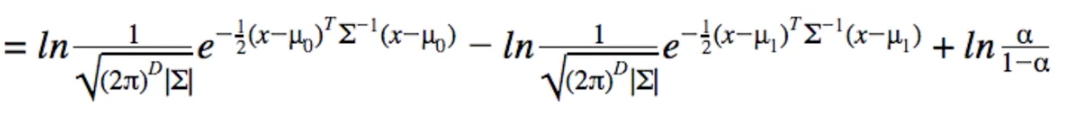

* We can also see that everything inside the square root will cancel out
* Once we have the exponential terms logged out, we can expand them like this: 

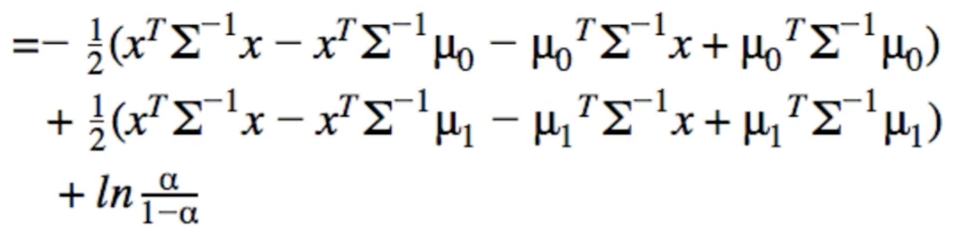

* Now we just have simple sum of products
* Notice the quadratic terms cancel out 
* The question remains though:

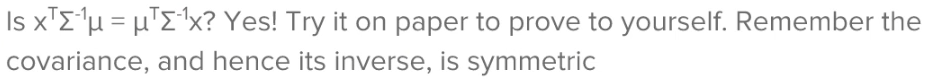

* Recall: The covariance generalizes the concept of variance to multiple random variables. Instead of measuring the fluctuation of a single random variable, the covariance measures the fluctuation of two variables with each other.

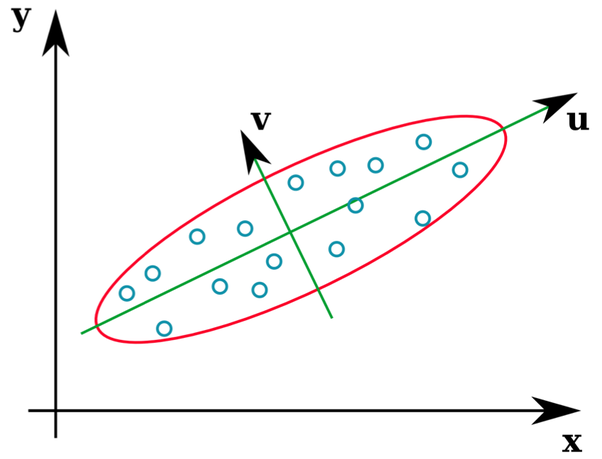

* Okay so once we have multiplied through the 1/2, and collected all of the terms that depend on x and don't depend on x, we arrive here:

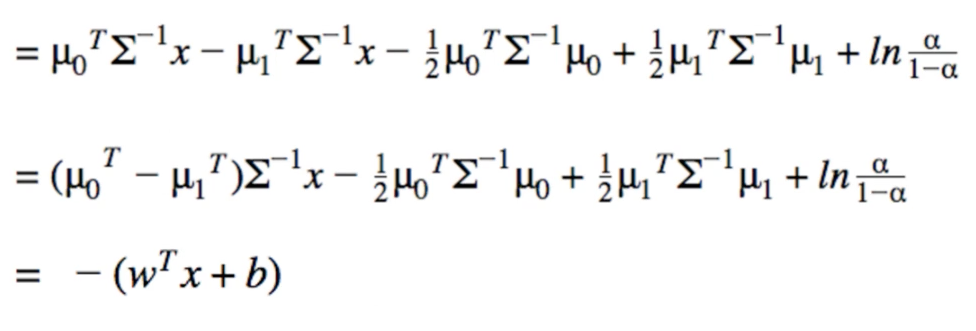

* This looks like our linear classifier form!
* Once again we have one term that depends on x (this correspond to w), and one term that does not depend on x (this term corresponds to b)

* Finally if you split out the terms for w and b, you arrive at these equations:

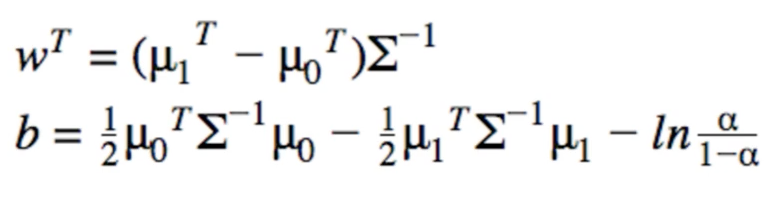

## What does this mean??
### Well, we just found a close form solution to finding the coefficients needed for our logistic regression equation:
# $$y = \sigma(w^Tx)= p(y=1|x)$$

# Our data
* In our coding examples, we are going to use 2 gaussians
* On centered at (-2, -2), and the other centered at (+2, +2)
* The variance of each dimension will be 1, and each dimension will be independent (so any off diagonals in the covariance will be 0)

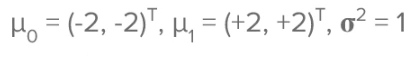

* As an exercise, try to prove that the solution here is w = (4,4), and b = 0 (on paper)
* We are assuming that we have an equal number of samples of both classes 

### A few more notes:
* This method above is also called **linear discriminant analysis (LDA)**
* If the covariance is a diagonal matrix, as in the example above, this is also an instance of naive bayes
* If we have different covariances, then the quadratic terms would no longer cancel out: we would have Quadratic discriminant analysis (QDA)
* This solution is optimal provided the assumptions we made about the distributions are true (generally they are not, so we would want to use gradient descent which is more applicable. 


---
# What do all these symbols mean?
To start with...
## Input Sizes
* N = number of samples we have collected 
    * i.e. I measure the height of 10 students and we find the average height. N = 10
* D = number of dimensions or features per sample
    * i.e. I measure height, weight, girth, and try to predict body fat %. D = 3 (height, weight, girth)
* A matrix of data called X would be an NxD matrix
    * each row is a sample
    * each column is the value of one feature in each sample 
    
## Data and Targets
* Sometimes we say we train a model on inputs X and targets Y
* if we consider all Ys at the same time, then it is an Nx1 matrix (for binary classification, an Nx1 matrix of 0s and 1s) 
* sometimes in this course we will use T for the target instead of Y. 
* the reason we use T instead of Y, is because we now use Y for something else 
    * In particular we use Y for the output of the logistic regression model 
    * remember, the real interpretation of the output of the logistic regression model is the probability of Y =1 given X, i.e. P(Y=1|X)
    * but this takes longer to write so we just shorten this to Y

## Cost function 
* Cost function = error function = objective function
* We want to minimize cost and error 
* But with the objective function, sometimes we create something to maximize, and other times we create something to minimize
* This is just a trivial sign flipping, since minimize X^2 is the same thing as maximizing -X^2
* We will first find something to maximize-what we call the likelihood, that is the probability of the data given a model, P(data|model)
* This is the same as maximizing the log likelihood, which we will call L
    * L = log P(data|model)
* Sometimes we use the letter J for the objective function, and sometimes we just make this the log likelihood, which is something we want to maximize 
    * J = L -> in that case we want to maximize
    * Or J = -L -> this acts as an error, and in that case we want to minimize 

---
# The Cross Entropy Error Function - Theory
* Don't worry about the name, the concept is actually very simple

## Logistic Regression Error
* Recall that in linear regression, we use the squared error objective function
### $$J = \sum_n(t_n - y_n)^2$$
* That is a fine error for a regression function, because it assumes your error is gaussian distributed 
    * that is because log(Gaussian) = squared function
* Of course, that can't work for logistic regression error because:
    * the output is between 0 and 1
    * the targets are only 0 or 1 
    * Hence, that is why we need a different error function - because it will not be gaussian distributed 
* What do we want out of an error function:
    * we want it to be 0 when there is no error
    * and we want it to get larger the more incorrect we are, i.e. more wrong == bigger cost

## Cross Entropy Error
### $$J = -\big[tlog(y)+(1-t)log(1-y)\big]$$
where t = target (remember, either 0 or 1), and y = output of logistic. This is the exact same error function as we saw in andrew NG machine learning course!!!

Remember, only one of these terms will matter, because target is going to be either 1 or 0! If the target is 1, only the first term matters, if the target is 0 only the second term matters. 

Also, recognize that y is a number between 0 and 1, it is the output of the logistic (sigmoid). If we log a number between 0 and 1 we get a number between 0 and -infinity. 

Notice how we take the negative of the entire thing. If we get negative infinity, that will turn into positive infinity. Lets look at a few examples. 

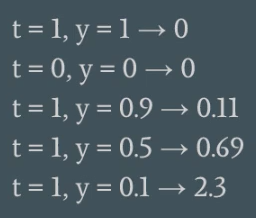

In the first two examples above we are right in our prediction, so we receive 0 error, which is great. As we continue our predictions become worse and worse, and the error increases. This is what we want in an error function!

## Multiple Training Examples
Finally, we want to calculate the total error to optimize across all of the training data simultaneously, so to do that we sum up over all of the individual errors. 

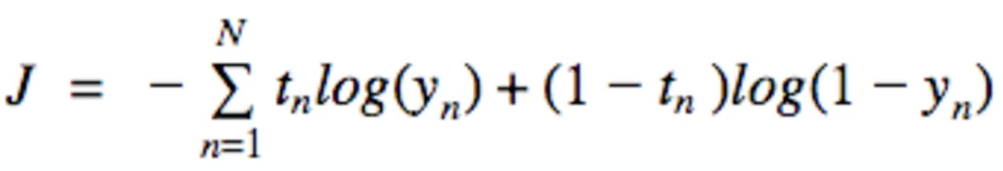